<a href="https://colab.research.google.com/github/pricemgp24/quokka_training/blob/main/Superdense_Coding_on_the_Quokka_with_QASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

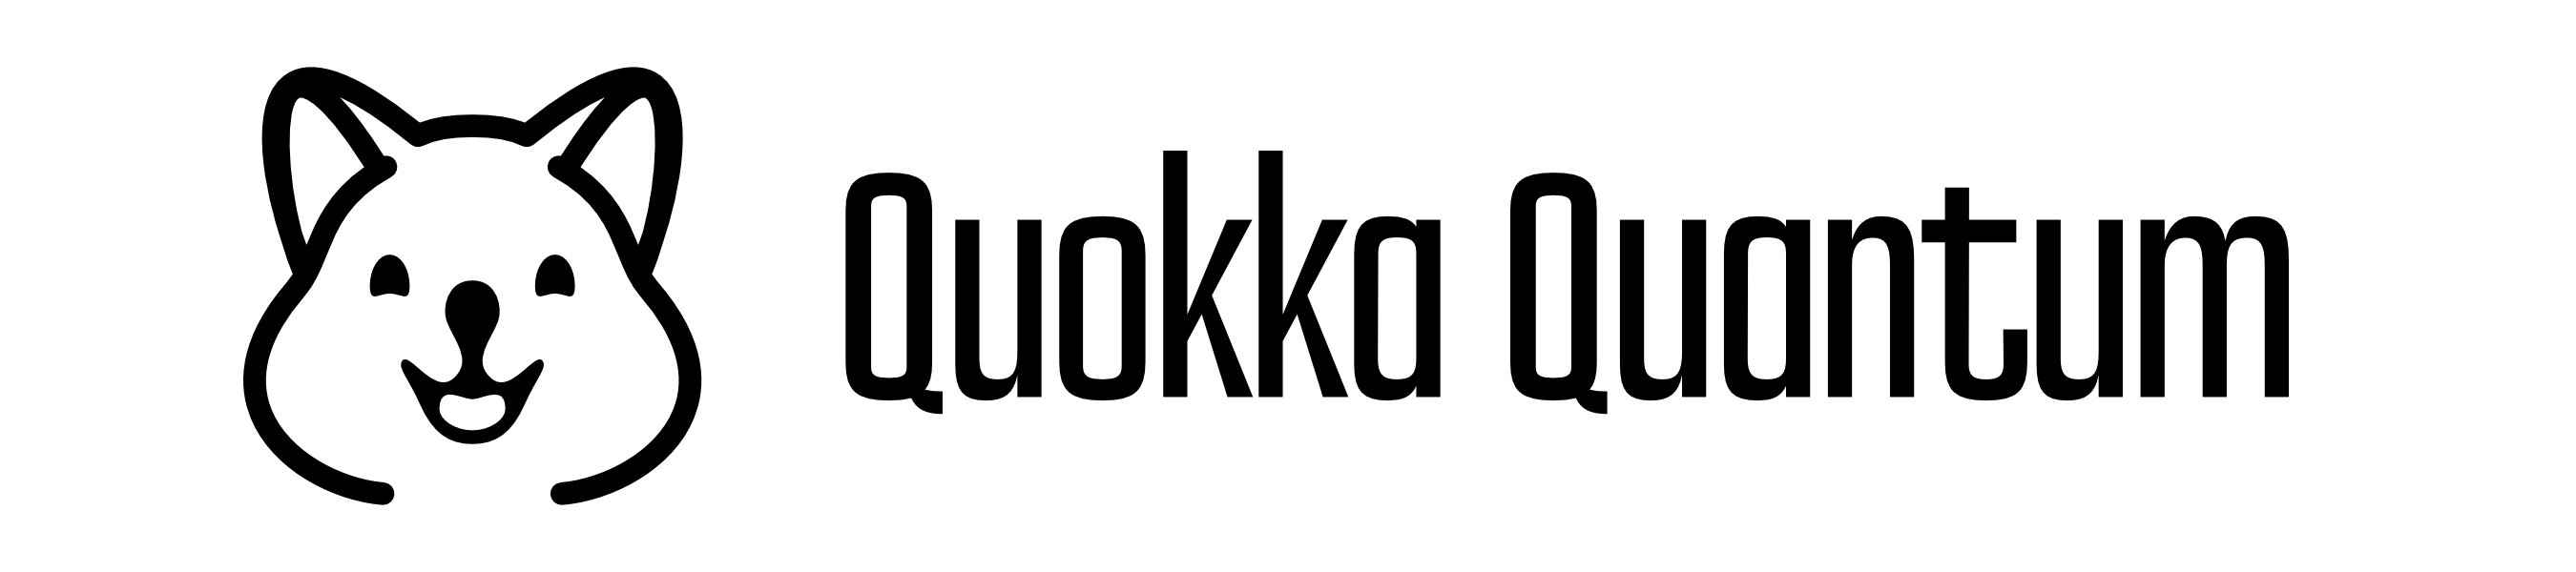

---

# **QASM compatibility**

This notebook provides an example of how to build quantum programs via QASM scripts.

---

# Setup Quokka for QASM

The documentation is here: https://github.com/openqasm/openqasm/tree/OpenQASM2.x. But looking at examples is just as easy.

If you are having trouble you can paste your QASM script into a tool such as (https://quantum-circuit.com/) to see the circuit created.

In [ ]:
# Data handling and communication
import json  # For working with JSON (JavaScript Object Notation) data
import requests  # For making HTTP requests to the Quokka
import numpy as np # Data structures

# Suppressing warnings (optional)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)  # Disable warnings about insecure requests

# current Quokka address:
req_str_qasm = 'http://quokka1.quokkacomputing.com/qsim/qasm'


# Superdense coding

[Superdense coding](https://en.wikipedia.org/wiki/Superdense_coding) is a protocol that allows the tranmission of two classical bits of information using one qubit of information. Alice and Bob must first share and entangled pair of qubits. The circuit diagram of the protocol looks as follows. The top two bits are chosen by Alice and encoded in her qubit through $X$ and $Z$ gates. Bob then unentangles the two qubits and measures, revealing the bits Alice encoded.

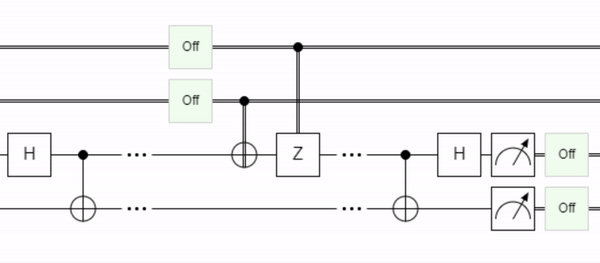

Let's get started. We will first create a string which will hold our program written in QASM. We can see also that the protocol requires two qubits. Since those are measured at the end, we also need to intialize two classical registers.

In [ ]:
code = '''OPENQASM 2.0;
qreg q[2];
creg c[2];
'''

The first thing Alice and Bob need to do is create entanglement.

In [ ]:
code += '''h q[0];
            cx q[0],q[1];
            '''

Now Alice needs to encode her message. There are four possibilities.

If Alice wants to send
* 00, she does nothing;
* 01, she performs an $X$ gate;
* 10, she performs a $Z$ gate;
* 11, she performs $XZ$.

Let's say Alice choses 11.


In [ ]:
code += '''x q[0];
            z q[0];
            '''

Now Alice sends her qubit to Bob. Bob unentangles them.

In [ ]:
code += '''cx q[0],q[1];
            h q[0];
            '''

Finally Bob measures both qubits.

In [ ]:
code += '''measure q[0] -> c[0];
            measure q[1] -> c[1];
            '''

Let's simulate this circuit on the Quokka.

Next, the Quokka requires a data structure which includes the QASM code and the number of runs of it to do. It will return a JSON object that contains some diagnostic information and the results of the measurement. In this case it should be "1 1".

In [ ]:
data = {
    'script': code,
    'count': 1,
    'state_vector': False
}

result = requests.post(req_str_qasm, json=data, verify=False)
json_obj = json.loads(result.content)

print(json_obj)

{'error': 'no error', 'error_code': 0, 'result': {'c': [[1, 1]]}}


Huzzah! Here's how to pull the results from the dictionary.

In [ ]:
bits = list(np.concatenate(list(json_obj['result'].values())).flat)

print(bits)

[1, 1]
